# Generator & Discriminator Networks

## Learning Goals

* Network Architecture
* Transfer of Working Example from Paper

In [2]:
# link to paper

# architecture from paper

# make blanks (do not remove imports)

## Theory

* [Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks](https://arxiv.org/pdf/1511.06434v2.pdf) \[1]
* [DC-GAN on paperswithcode](https://paperswithcode.com/method/dcgan)

## Guidelines for stable Deep Convolutional GANs

Excerpt from [1]:
* Replace any pooling layers with strided convolutions (discriminator) and fractional-strided convolutions (generator).
* Use batchnorm in both the generator and the discriminator.
* Remove fully connected hidden layers for deeper architectures.
* Use ReLU activation in generator for all layers except for the output, which uses Tanh.
* Use LeakyReLU activation in the discriminator for all layers.

## Generator

Original generator architecture from [1]:

<img src="img/dcgan-generator.png" alt="DCGAN Generator" style="width:600px;" />

Imports

In [4]:
from tensorflow.python.keras.engine.sequential import Sequential
from tensorflow.python.keras.layers import Dense, Reshape, BatchNormalization, ReLU, LeakyReLU, UpSampling2D, Conv2DTranspose

Function to build the generator model

In [5]:
def build_generator_net():
    return Sequential([
        # 100d vector to provide randomness
        # 1/16th of original size (1/4th for height, width) as low-resolution base image
        # capacity for 256 such base images
        # [...]

        # make it a 3d volume to be able to do convolutions
        # [...]
        
        # conv to increase depth to 128, activation, normalization
        # [...]

        # upsample to 14x14, activation, normalization
        # [...]

        # upsample to 28x28, activation between -1 and 1 (matches value range after preprocessing of real images)
        # [...]
    ], name='generator')


Test generator model

(1, 28, 28, 1)


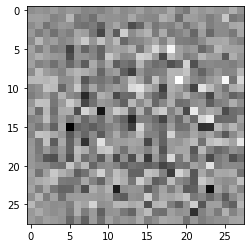

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from solutions.generator_net import build_generator_net_sln


# use your implementation
generator = build_generator_net_sln()

noise = np.random.normal(size=(1, 100)).astype(np.float32)
generated = generator(noise, training=False)

print(generated.shape)
plt.imshow(generated.numpy()[0, :, :, 0], cmap='gray')
plt.show()

# Discriminator

The discriminator is basically a binary classifier that outputs whether an image is real or fake.

Imports

In [8]:
from tensorflow.python.keras.engine.sequential import Sequential
from tensorflow.python.keras.layers import Dense, LeakyReLU, Conv2D, Dropout, Flatten

Function to build the discriminator model

In [8]:
def build_discriminator_net():
    return Sequential([
        # strided conv on input shape 28x28x1, activation, dropout
        # [...]

        # strided conv on shape 14x14, activation, dropout
        # [...]

        # binary output probability between 0 and 1
        # [...]
    ], name='discriminator')


Test discriminator model

In [3]:
import numpy as np
from solutions.generator_net import build_generator_net_sln
from solutions.discriminator_net import build_discriminator_net_sln


# use your implementation
generator = build_generator_net_sln()
discriminator = build_discriminator_net_sln()

noise = np.random.normal(size=(1, 100)).astype(np.float32)
generated = generator(noise, training=False)

real_or_fake = discriminator(generated)
print(real_or_fake.numpy()[0][0])

0.49922895
